# 1. Tujuan

Notebook ini bertujuan untuk mengimplementasikan dan menganalisis beberapa transformasi intensitas citra secara manual menggunakan NumPy, yaitu:

*   **Transformasi Linear**
*   **Transformasi Negatif**
*   **Koreksi Gamma**
*   **Thresholding**

# 2. Library yang Digunakan

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 3. Pembacaan Citra
Pastikan file gambar (`gelap.jpg`, `terang.jpg`, `lowContrast.jpg`, `highContrast.jpg`, `custom.jpg`) berada di folder yang sama dengan notebook ini.

In [13]:
upload = files.upload()
try:
    img_gelap = cv.imread("gelap.jpg")
    img_terang = cv.imread("terang.jpg")
    img_low = cv.imread("lowContrast.jpg")
    img_high = cv.imread("highContrast.jpg")
    img_custom = cv.imread("custom.jpg")
    print("Citra berhasil dimuat.")
except Exception as e:
    print("Gagal memuat citra. Pastikan file tersedia.")

# Catatan: OpenCV membaca citra dalam format BGR,
# sehingga perlu konversi saat ditampilkan dengan Matplotlib.

Saving custom.jpg to custom.jpg
Saving gelap.jpg to gelap.jpg
Saving highContrast.jpg to highContrast.jpg
Saving lowContrast.jpg to lowContrast.jpg
Saving terang.jpg to terang.jpg
Citra berhasil dimuat.


# 4. Implementasi Fungsi Transformasi

## 4.1 Transformasi Linear
$s = a \cdot r + b$

In [14]:
def linear(image, alpha, beta):
    # Menggunakan int16 agar tidak terjadi overflow saat kalkulasi sebelum di-clip
    b = alpha * image[:, :, 0].astype(np.int16) + beta
    g = alpha * image[:, :, 1].astype(np.int16) + beta
    r = alpha * image[:, :, 2].astype(np.int16) + beta

    out = np.stack([b, g, r], axis=2)
    return np.clip(out, 0, 255).astype(np.uint8)

## 4.2 Transformasi Negatif
$s = 255 - r$

In [15]:
def negative(image):
    return linear(image, -1, 255)

## 4.3 Konversi BGR ke Grayscale
Menggunakan rumus luminansi:
$I_{gray} = 0.299R + 0.587G + 0.114B$

In [16]:
def bgr_to_grayscale(image):
    b = image[:, :, 0].astype(np.float32)
    g = image[:, :, 1].astype(np.float32)
    r = image[:, :, 2].astype(np.float32)

    return (0.299 * r + 0.587 * g + 0.114 * b).astype(np.uint8)

## 4.4 Thresholding
Mengubah citra grayscale menjadi citra biner.

In [17]:
def threshold(image, thresh):
    gray = bgr_to_grayscale(image)
    return np.where(gray > thresh, 255, 0).astype(np.uint8)

## 4.5 Koreksi Gamma
$s = c \cdot r^\gamma$

In [18]:
def gamma_correction(image, c, gamma):
    # Normalisasi ke [0,1] seringkali dilakukan untuk kestabilan gamma
    # Namun di sini diimplementasikan sesuai instruksi manual
    b = c * (image[:, :, 0].astype(np.float32) ** gamma)
    g = c * (image[:, :, 1].astype(np.float32) ** gamma)
    r = c * (image[:, :, 2].astype(np.float32) ** gamma)

    out = np.stack([b, g, r], axis=2)
    return np.clip(out, 0, 255).astype(np.uint8)

# 5. Visualisasi Hasil
Contoh pada Citra Kontras Rendah (`img_low`)

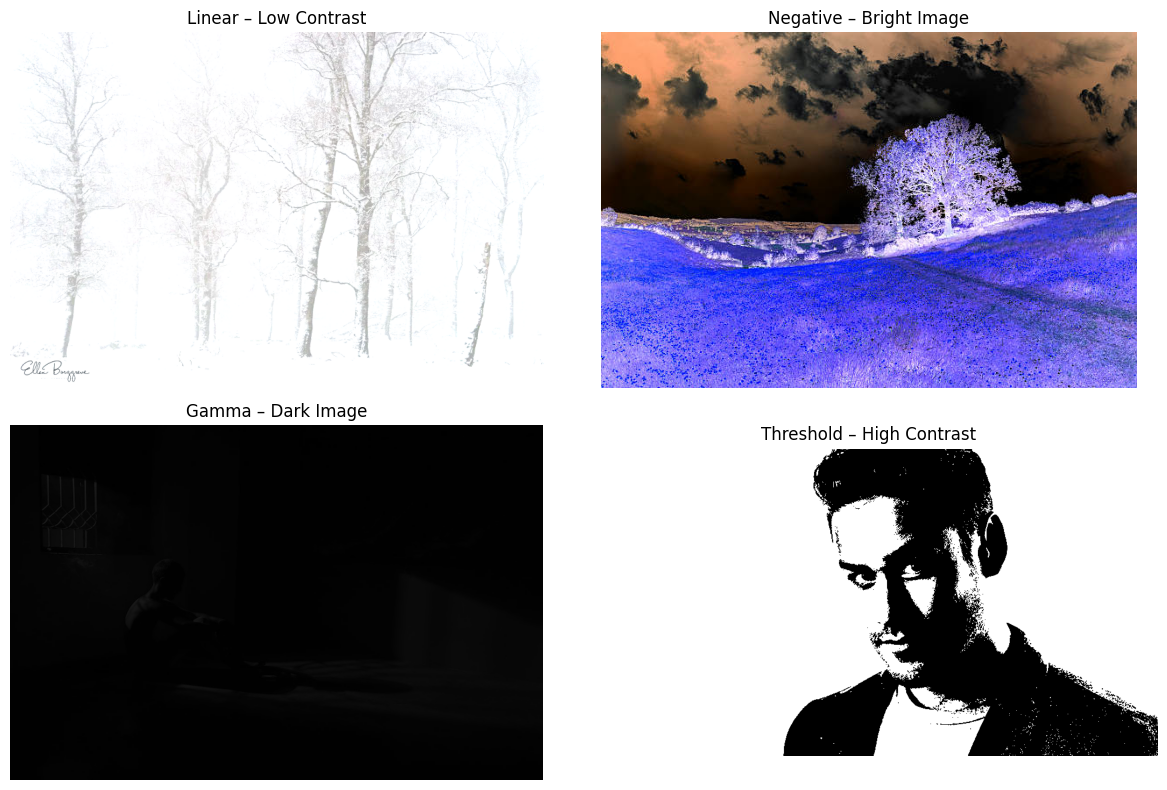

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(linear(img_low, 1.5, 30)[:, :, ::-1])
plt.title("Linear – Low Contrast")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(negative(img_terang)[:, :, ::-1])
plt.title("Negative – Bright Image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(gamma_correction(img_gelap, 1, 0.6)[:, :, ::-1])
plt.title("Gamma – Dark Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(threshold(img_high, 127), cmap="gray")
plt.title("Threshold – High Contrast")
plt.axis("off")

plt.tight_layout()
plt.show()


# 6. Analisis Singkat

1.  **Transformasi Linear** digunakan untuk meningkatkan kontras dan kecerahan citra dengan mengatur parameter $\alpha$ dan $\beta$. Pada citra dengan kontras rendah, transformasi ini mampu memperjelas perbedaan intensitas antar piksel.
2.  **Transformasi Negatif** membalik nilai intensitas piksel sehingga area terang menjadi gelap dan sebaliknya. Metode ini berguna untuk menonjolkan detail tertentu, terutama pada citra dengan latar belakang terang.
3.  **Koreksi Gamma** digunakan untuk menyesuaikan kecerahan citra sesuai dengan karakteristik persepsi visual manusia. Nilai $\gamma < 1$ meningkatkan kecerahan pada area gelap, sedangkan $\gamma > 1$ menekan intensitas pada area terang.
4.  **Thresholding** mengubah citra grayscale menjadi citra biner berdasarkan nilai ambang tertentu. Metode ini efektif untuk segmentasi objek sederhana, namun sangat bergantung pada pemilihan nilai threshold.

# 7. Kesimpulan

Transformasi intensitas citra dapat meningkatkan kualitas visual dan membantu proses analisis citra. Setiap metode memiliki karakteristik dan kegunaan yang berbeda, sehingga pemilihan transformasi harus disesuaikan dengan kondisi citra dan tujuan pengolahan.